<a href="https://colab.research.google.com/github/maitreyi-ashok/codespaces-jupyter/blob/main/SpotifyMusicRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np, pandas as pd, seaborn as sns

import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/Spotify_data.csv')

In [21]:
df.head(10)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.01070,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.02920,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.35900,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.03750,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.02290,0.000001,0.3110,0.844,151.019
5,5,Type Shit,"Future, Metro Boomin, Travis Scott, Playboi Carti",WE DON'T TRUST YOU,4iqbFIdGOTzXeDtt9owjQn,28drn6tQo95MRvO0jQEo5C,88,2024-03-22,228267,True,...,0.552,2,-5.679,1,0.1290,0.02150,0.000000,0.1190,0.112,144.941
6,6,CARNIVAL,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",VULTURES 1,30zwjSQEodaUXCn11nmiVF,3w0w2T288dec0mgeZZqoNN,87,2024-02-09,264324,True,...,0.811,1,-5.746,1,0.1590,0.18900,0.000000,0.3390,0.311,148.144
7,7,Prada,"cassö, RAYE, D-Block Europe",Prada,5MU0RmBSpoSxOPYBfcobDc,59NraMJsLaMCVtwXTSia8i,87,2023-08-11,132359,True,...,0.717,8,-5.804,1,0.0375,0.00100,0.000002,0.1130,0.422,141.904
8,8,euphoria,Kendrick Lamar,euphoria,32bR4LcEc1PvJEhaKoo4ZN,77DRzu7ERs0TX3roZcre7Q,88,2024-04-30,383639,True,...,0.643,1,-5.002,1,0.1100,0.04600,0.000000,0.0840,0.142,139.948
9,9,redrum,21 Savage,american dream,2RRYaYHY7fIIdvFlvgb5vq,52eIcoLUM25zbQupAZYoFh,87,2024-01-12,270698,True,...,0.733,2,-8.757,1,0.0488,0.00598,0.000983,0.3750,0.244,172.090


In [22]:
df.describe()

,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,227.000000,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,113.000000,71.85022,219254.881057,0.635639,0.646665,5.458150,-6.516670,0.678414,0.079576,0.375060,0.028890,0.177797,0.472441,119.466361
std,65.673435,10.24110,60483.492317,0.155123,0.159150,3.760738,2.099543,0.468117,0.085100,0.300084,0.137225,0.121366,0.193902,26.154889
min,0.000000,13.00000,96947.000000,0.271000,0.236000,0.000000,-15.073000,0.000000,0.024600,0.000307,0.000000,0.029700,0.038500,61.311000
25%,56.500000,68.00000,170554.500000,0.552000,0.539500,2.000000,-7.830000,0.000000,0.033800,0.065000,0.000000,0.101000,0.324500,95.457500
50%,113.000000,72.00000,222462.000000,0.634000,0.655000,6.000000,-6.346000,1.000000,0.042100,0.393000,0.000002,0.127000,0.462000,122.925000
75%,169.500000,78.00000,265611.000000,0.746000,0.763500,9.000000,-5.080500,1.000000,0.081200,0.630500,0.000170,0.219000,0.595000,137.952000
max,226.000000,96.00000,383639.000000,0.948000,0.972000,11.000000,-0.424000,1.000000,0.491000,0.940000,0.901000,0.790000,0.972000,187.629000


In [23]:
df.dtypes

,0
Unnamed: 0,int64
Track Name,object
Artists,object
Album Name,object
Album ID,object
Track ID,object
Popularity,int64
Release Date,object
Duration (ms),int64
Explicit,bool


In [26]:
df1 = df.drop(columns=["Unnamed: 0", "Track Name", "Artists", "Album Name", "Album ID", "Track ID", "Release Date"])
df1.head()


,Popularity,Duration (ms),Explicit,External URLs,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,96,274192,True,https://open.spotify.com/track/6AI3ezQ4o3HUoP6...,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,94,227239,True,https://open.spotify.com/track/2HYFX63wP3otVIv...,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,91,140733,True,https://open.spotify.com/track/7iabz12vAuVQYye...,0.882,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,90,149668,False,https://open.spotify.com/track/331l3xABO0HMr1K...,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,89,144846,False,https://open.spotify.com/track/48lxT5qJF0yYyf2...,0.788,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [27]:
df_noncategorical = df.select_dtypes(include=['number'])
df_noncategorical.corr()


,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Unnamed: 0,1.000000,-0.648005,0.548269,-0.511844,-0.443960,0.030170,-0.342513,0.069230,-0.387342,0.723597,-0.184914,-0.250460,-0.053936,-0.294289
Popularity,-0.648005,1.000000,-0.269510,0.251928,0.250068,-0.008550,0.308110,-0.008246,0.190621,-0.431117,0.104846,0.066110,-0.045580,0.131820
Duration (ms),0.548269,-0.269510,1.000000,-0.484826,-0.365698,-0.012312,-0.256522,0.158170,-0.312642,0.476488,-0.212550,-0.104685,-0.217561,-0.160446
Danceability,-0.511844,0.251928,-0.484826,1.000000,0.242587,-0.013330,0.166232,-0.118235,0.419217,-0.498951,0.077016,0.030781,0.338242,0.232993
Energy,-0.443960,0.250068,-0.365698,0.242587,1.000000,-0.017352,0.678558,-0.063101,0.103059,-0.616124,0.250163,0.239486,0.201095,0.186659
Key,0.030170,-0.008550,-0.012312,-0.013330,-0.017352,1.000000,-0.093016,-0.061717,0.004854,0.055651,0.054473,0.013291,0.093400,0.015901
Loudness,-0.342513,0.308110,-0.256522,0.166232,0.678558,-0.093016,1.000000,0.001383,0.037858,-0.503469,-0.057236,0.121415,0.107138,0.079587
Mode,0.069230,-0.008246,0.158170,-0.118235,-0.063101,-0.061717,0.001383,1.000000,-0.069425,0.147149,-0.079684,-0.096436,-0.004017,-0.159426
Speechiness,-0.387342,0.190621,-0.312642,0.419217,0.103059,0.004854,0.037858,-0.069425,1.000000,-0.367282,0.031381,0.055212,0.148823,0.264213
Acousticness,0.723597,-0.431117,0.476488,-0.498951,-0.616124,0.055651,-0.503469,0.147149,-0.367282,1.000000,-0.126060,-0.267920,-0.021957,-0.404191


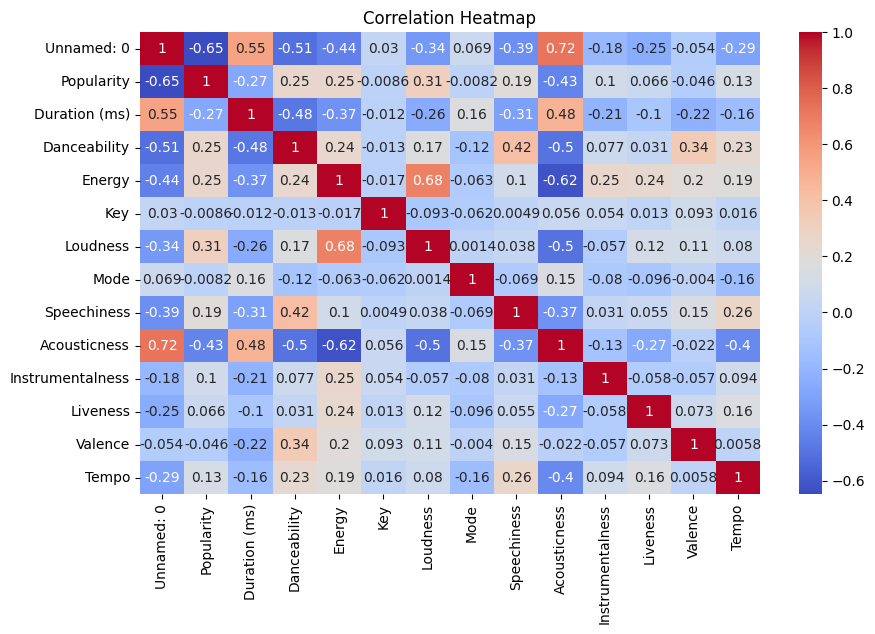

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_noncategorical.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


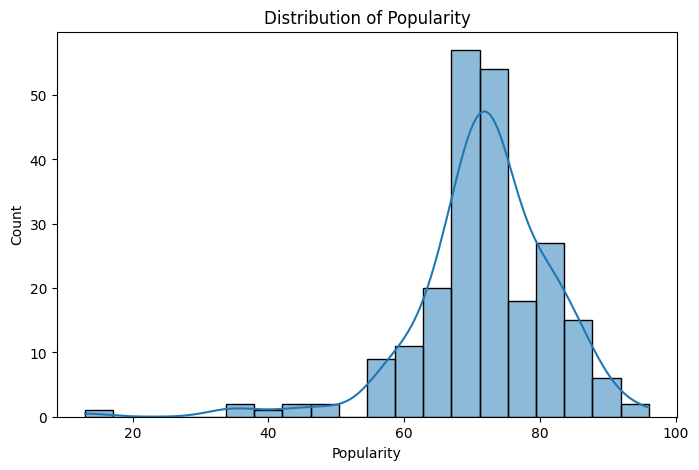

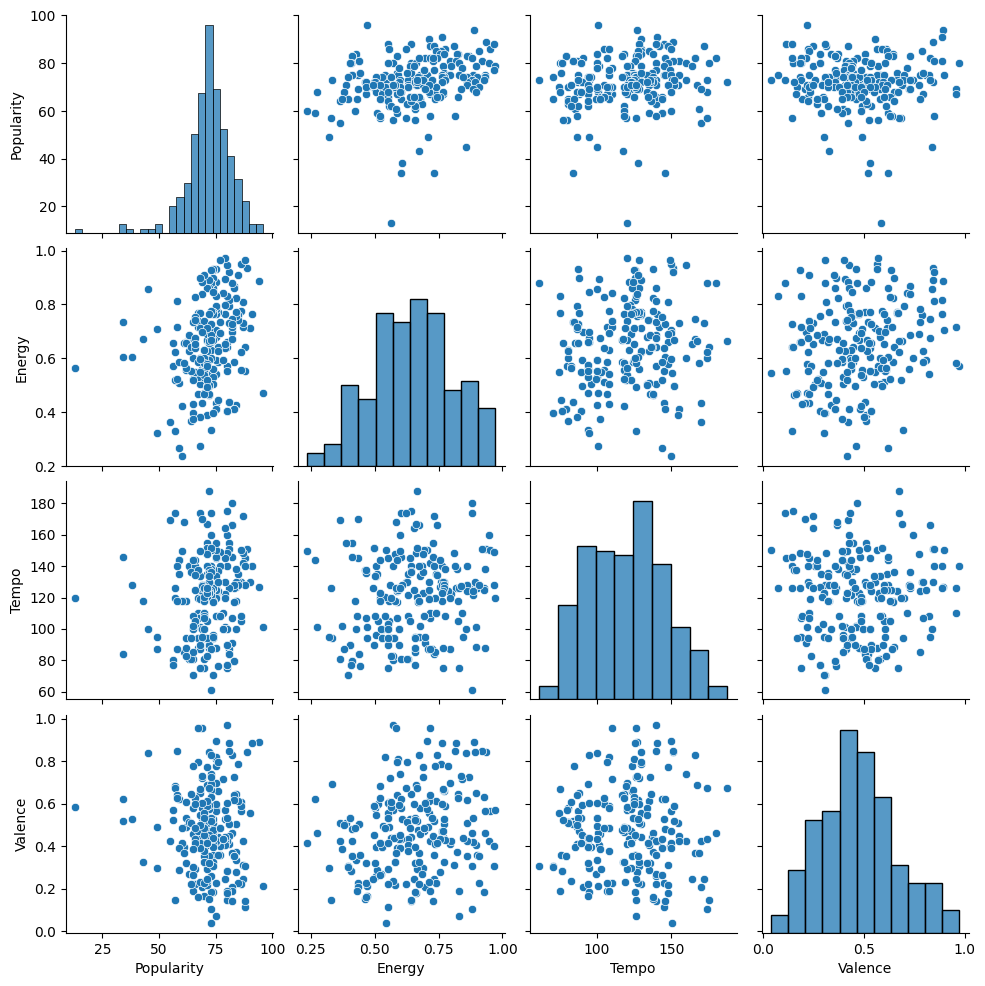

In [16]:

# Distribution of popularity
plt.figure(figsize=(8, 5))
sns.histplot(df["Popularity"], bins=20, kde=True)
plt.title("Distribution of Popularity")
plt.show()

# Pairplot for selected features
sns.pairplot(df[["Popularity", "Energy", "Tempo", "Valence"]])
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Display column names to verify
print("Columns in DataFrame:", df.columns)

# Drop only the columns that exist in the dataset
columns_to_drop = ["Unnamed: 0", "Track Name", "Artists", "Album Name", "Album ID", "Track ID", "Release Date", "External URLs"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Convert 'Explicit' to integer if it exists
if "Explicit" in df.columns:
    df["Explicit"] = df["Explicit"].astype(int)

# Ensure 'Popularity' exists before splitting
if "Popularity" in df.columns:
    # Split features and target
    X = df.drop(columns=["Popularity"])
    y = df["Popularity"]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Data preprocessing completed successfully! 🚀")
else:
    print("Error: 'Popularity' column not found in DataFrame!")


Columns in DataFrame: Index(['Popularity', 'Duration (ms)', 'Explicit', 'External URLs',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')
Data preprocessing completed successfully! 🚀


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 65.96325107910069
R^2 Score: 0.008958823605672794


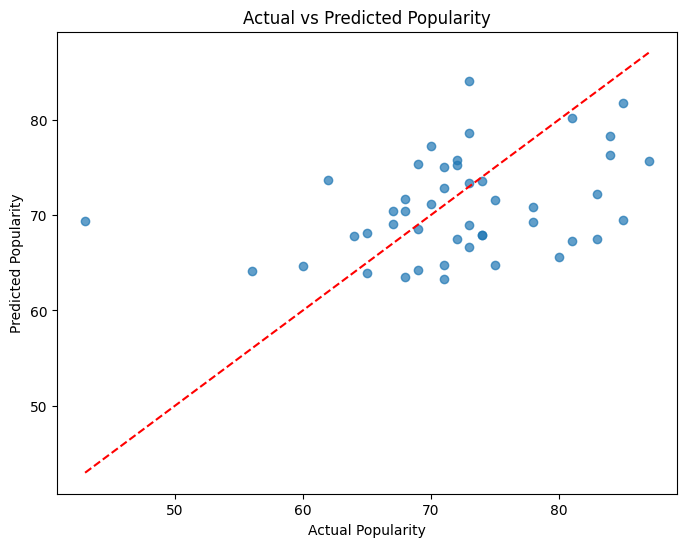

In [32]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()

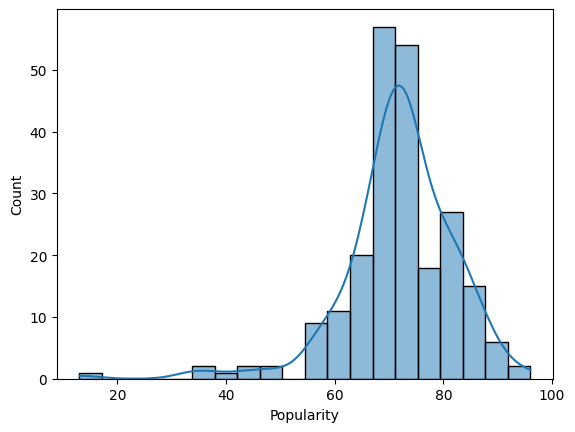

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Popularity"], bins=20, kde=True)
plt.show()


In [34]:
df["Popularity"] = np.log1p(df["Popularity"])


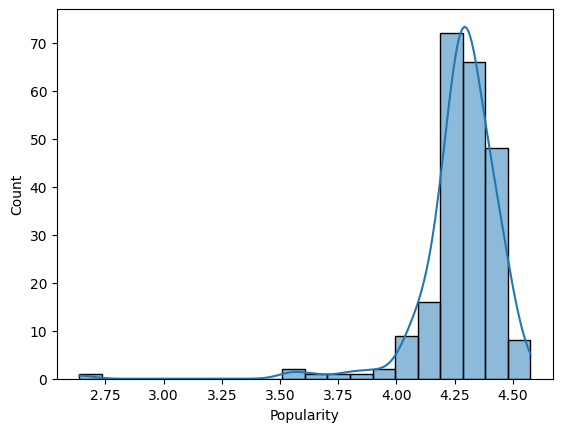

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Popularity"], bins=20, kde=True)
plt.show()


In [36]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a simple model to check feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
for i in sorted_idx[:10]:  # Show top 10 features
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Acousticness: 0.3033
Liveness: 0.1066
Duration (ms): 0.0992
Speechiness: 0.0776
Danceability: 0.0743
Valence: 0.0661
Energy: 0.0635
Tempo: 0.0591
Key: 0.0481
Loudness: 0.0423


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 45.94445256642511
R² Score: 0.30972407248966527
